# **Lab 6: Differential equations**
**Dániel Szabó**

# **Abstract**

This laboratory is about approximating the solutions of differential equations. Given an initial value problem (IVP) 
$$\dot{u}(t)=f(u(t),t);\ u(0)=u_0,$$
the goal is to determine function $u:[0,T]\to\mathbb{R}$.

When approximating the solution, the task is to calculate the approximate value of the function at the final time $U(T)\approx u(T)$. This is done by time stepping methods, e.g. the trapezoidal method that will be used in the lab.

#**About the code**

In [38]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2021 Dániel Szabó (dszabo@kth.se)

# This file is part of the course DD2365 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [39]:
# Load neccessary modules.
import numpy as np
import scipy.optimize
import random
from matplotlib import pyplot as plt

random.seed(0)

# **Introduction**

The trapezoidal method calculates the output $U(T)$ by successive approximations of some values of function $u$. We have a partition of the interval $t_0,t_1,\dots,t_N$, where $t_0=0$, $t_i<t_j$ if $i<j$ and $t_N=T$; and we start from the given initial value: $U(t_0)=u_0$. Then we use the following formula $N$ times to calculate the next approximation from the previous one. 
$$U(t_n)=U(t_{n-1})+\frac{\Delta t_n}{2}(f(U(t_n),t_n)+f(U(t_{n-1}),t_{n-1}))$$
where $\Delta t_n=t_n-t_{n-1}$. As the right hand side depends on $U(t_n)$, we cannot compute it directly, but we can use Newton's method to find a root of function $x-U(t_{n-1})-\frac{\Delta t_n}{2}(f(x,t_n)+f(U(t_{n-1}),t_{n-1}))$.

The first task is to implement a time stepping method for solving a scalar IVP, and the second one is the same for a system of IVPs. The second task can be interpreted as an IVP of vectors.

# **Method**

Method "trapezoidal" first does some input validation: the number of steps and $T$ have to be positive, and the output of function $f$ needs to have the same shape as its input. Then it performs the calculations described in the Introduction section with every $\Delta t_n=T/N$, where $N$ is the number of steps. We use the scipy.optimize.newton implementation of Newton's method.

Note that method "trapezoidal" works for both the scalar and the vector case, so it solves both tasks.

In [40]:
def trapezoidal(T,f,u0,steps=1024):
    if T<=0:
        raise Exception("The final time has to be a positive number.")
    if steps<=0:
        raise Exception("The number of steps has to be a positive number.")
    if np.shape(u0)!=np.shape(f(u0)):
        raise Exception("The input and output dimensions of f have to be the same.")
    
    t = 0
    k = T/steps
    while t<T:
        u1 = scipy.optimize.newton(lambda u: u-u0-k/2*(f(u)+f(u0)), u0)
        u0 = u1
        t += k
    return u1

# **Results**

For the verification of the first task we need a function $f:\mathbb{R}\to\mathbb{R}$ that describes the relationship between $\dot{u}$ and $u$. Method "f" implements a simple function: $f(u)=-\alpha u$, where $\alpha$ is a random number from interval $[0.5,5]$. The initial condition is $u_0=1$. This way, we know that the exact solution is $u(t)=\exp(-\alpha t)$, and we can easily check the precision of the approximate solution given by the trapezoidal method. We search the value of $u$ at many different $T$ values and plot the results (the approximate $u$ function).

The IVP is always stable, because the only equilibrium point is $u^*=0$, and $f'(u)=-\alpha$, which is always negative since $\alpha\in[0.5,5]$. The time stepping method is also stable because the trapezoidal method is unconditionally stable.

The results show that the approximation is close to the exact solution for all the $T$ values that we looked at. We can see on the plot that the function is decaying, so the problem is stable indeed. Some tests with invalid input are also provided.

u(t) = exp(-4.299898331862717*t)


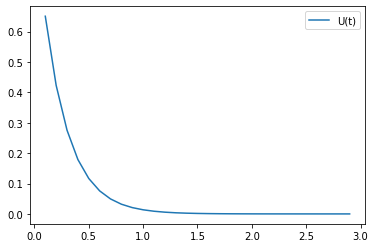

In [41]:
alpha = random.uniform(0.5,5)
print("u(t) = exp(-", alpha, "*t)", sep='')

def f(u):
    return -alpha*u

u0 = 1
data = []
x_axis = np.arange(0.1, 3, 0.1)
for T in x_axis:
    U_T = trapezoidal(T,f,u0)
    u_T = np.exp(-alpha*T)
    data.append(U_T)
    np.testing.assert_almost_equal(u_T, U_T, decimal=3)

plt.figure()
plt.plot(x_axis, data, label="U(t)")
plt.legend()
plt.show()

# Invalid input test: non-positive T
np.testing.assert_raises(Exception, trapezoidal, -1, f, u0, 128)

# Invalid input test: non-positive N
np.testing.assert_raises(Exception, trapezoidal, T, f, u0, 0)

For the verification of the second task we need a function $f:\mathbb{R}^d\to\mathbb{R}^d$ that describes the relationship between vectors $\dot{u}$ and $u$. Method "fv" implements a function like the one in Example 14.1 of the lecture notes. The system has the following form
$$\begin{bmatrix} \dot{u_1}\\ \dot{u_2}\end{bmatrix} =
f\left( \begin{bmatrix} u_1\\ u_2\end{bmatrix}\right) =
\begin{bmatrix} -\nu & \gamma\\ 0 & -\nu\end{bmatrix}
\begin{bmatrix} u_1\\ u_2\end{bmatrix}$$
with initial conditions $u_1(0)=0$ and $u_2(0)=\kappa$. All three greek letters ($\nu$, $\gamma$ and $\kappa$) correspond to random numbers from interval $[0.5,5]$. We know that the exact solution of the system is $u_1(t)=\gamma\kappa t \exp(-\nu t)$ and $u_2(t)=\kappa \exp(-\nu t)$. This way, we can easily check the precision of the approximate solution given by the trapezoidal method. We search the value of $u_1$ and $u_2$ at many different $T$ values and plot the results (the approximate $u_1$ and $u_2$ functions).

Matrix $\begin{bmatrix} -\nu & \gamma\\ 0 & -\nu\end{bmatrix}$ (which is both the system matrix and its Jacobian) is defective, it has only one eigenvalue: $\nu$ (with algebraic multiplicity 2). As it is positive, it is stable. But with defective matrices, this kind of analysis is not always reliable, because there may be a strong (but transient) growth before the solution decays to zero.

The results show that both coordinates of the approximation are close to the exact solution for all the $T$ values that we looked at. We can see on the plot that $U_2(t)$ is decaying, and that after a short growing phase, $U_1(t)$ is decaying too, so the problem seems stable. A test with invalid input is also provided.

u1(t) = 6.5119636850856635*t*exp(-2.3925721137388027*t)
u2(t) = 1.6651253763183351*exp(-2.3925721137388027*t)


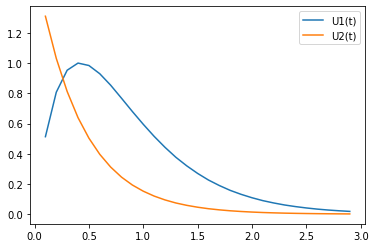

In [42]:
gamma = random.uniform(0.5,5)
nu = random.uniform(0.5,5)
kappa = random.uniform(0.5,5)
print("u1(t) = ", gamma*kappa, "*t*exp(-", nu, "*t)", sep='')
print("u2(t) = ", kappa, "*exp(-", nu, "*t)", sep='')

def fv(u):
    A = np.array([[-nu, gamma], [0, -nu]])
    return A @ u

u0 = [0, kappa]
data1 = []
data2 = []
x_axis = np.arange(0.1, 3, 0.1)
for T in x_axis:
    U2_T = trapezoidal(T,fv,u0)
    u2_T = [gamma*kappa*T*np.exp(-nu*T), kappa*np.exp(-nu*T)]
    data1.append(U2_T[0])
    data2.append(U2_T[1])
    np.testing.assert_almost_equal(u_T, U_T, decimal=5)

plt.figure()
plt.plot(x_axis, data1, label='U1(t)')
plt.plot(x_axis, data2, label='U2(t)')
plt.legend()
plt.show()

# Invalid input test: wrong function
def g(u):
    return u[0]
np.testing.assert_raises(Exception, trapezoidal, T, g, u0)

# **Discussion**

The method, implemented for solving the tasks, actually succeeded in solving them, as it is confirmed by the test results.

The trapezoidal method was chosen because of its unconditional stability. The test functions are not too complicated because this way it is easy to check is the approximations given by our method are close enough to the exact solution. The plotting of the exact function next to the approximate one was also tried, but they were completely overlapping each other, so there was no point in showing both of them.